<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/7.3_Data_Analytics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis (EDA)**

EDA is an approach to analyse data in order to summarize main characteristics of the data & gain better understanding of the dataset & uncover relationships between different variables & extract important variables for the problem being solved.

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(url, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [54]:
# Analysing Individual Feature Patterns using Visualization
# When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


In [55]:
# Data type of 'peak-rpm'
df['peak-rpm'].dtype

dtype('float64')

In [56]:
# we can calculate the correlation between variables of type "int64" or "float64" using the method "corr"
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53350.11825161361)

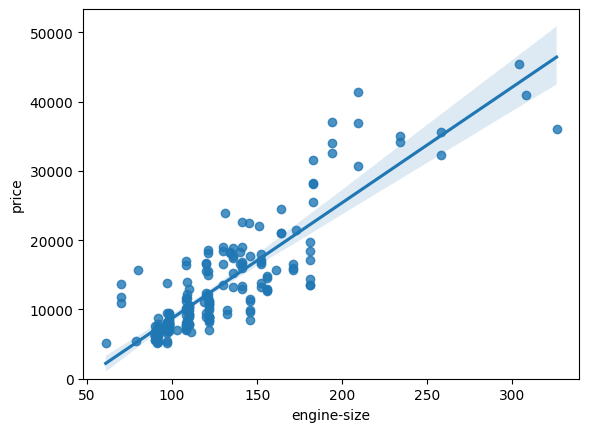

In [57]:
# Continuous Numerical Variables - variables that may contain any value within some range.
# In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data
# Positive Linear Relationship btw 'engine-size' and 'price'
sns.regplot(x='engine-size', y='price', data=df,)
plt.ylim(0, )

Interpretation - As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [58]:
# Correlation between 'engine-size' and 'price'
corr = df[['engine-size', 'price']].corr()
print(corr)

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


(0.0, 48171.852053546114)

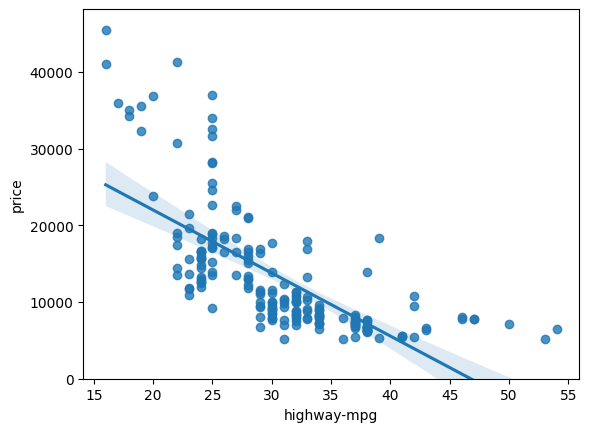

In [59]:
# Negative Linear Relationship btw highway-mpg and price
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0, )

In [60]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Interpretation: As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [61]:
print("correlation between stroke and price:")
df[['stroke', 'price']].corr()

correlation between stroke and price:


,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

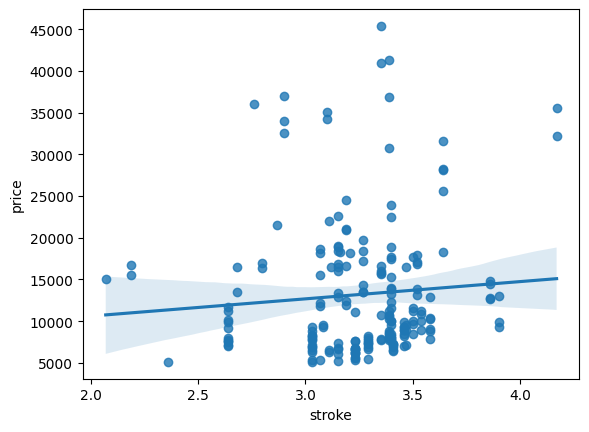

In [62]:
sns.regplot(x='stroke', y='price', data=df)

Interpretation: There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well

#### Catagorical Variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='body-style', ylabel='price'>

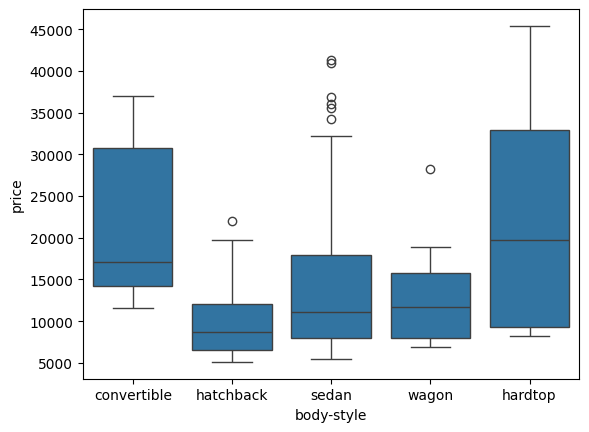

In [63]:
# Relationship between 'body-style' and 'price'
sns.boxplot(x='body-style', y='price', data=df)

Interpretation: We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='engine-location', ylabel='price'>

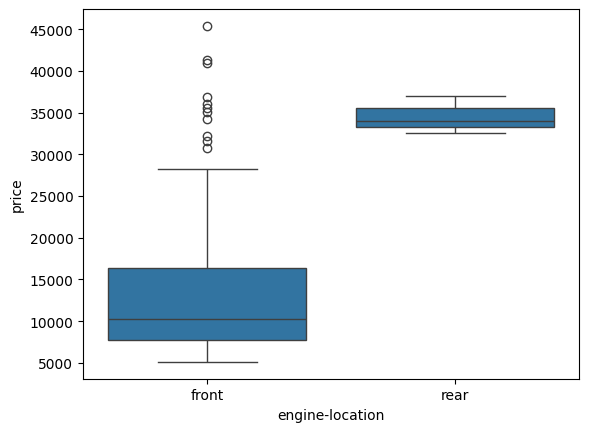

In [64]:
# Relationship between 'engine-location' and 'price'
sns.boxplot(x='engine-location', y='price', data=df)

Interpretation: Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='drive-wheels', ylabel='price'>

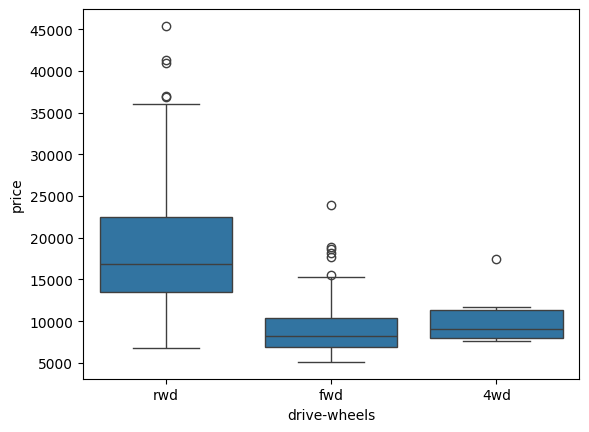

In [65]:
# Relationship between 'drive-wheels' and 'price'
sns.boxplot(x='drive-wheels', y='price', data=df)

Interpretation: Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

#### Descritpive Statistical Analysis
Descriptive Analysis helps to describe that basic features of a dataset and obtains a short summary about the samples and measures of the data.
Various methods of descriptive statistics include:
*	.describe() function in pandas – By using the describe function and applying it on the data frame, the describe function automatically computes basic statistics for all numerical variables – shows the mean, count (number of data points), standard deviation, quartiles (25%, 50%, 75%) and the extreme values (max, min) – any NaN values are automatically skipped in these statistics
* Value_counts() method summarizes the categorical variables in a dataset – includes those variables that can be divided up into different categories/ groups and have discrete values

In [66]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [67]:
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [68]:
# We can convert the series to a dataframe using the to_frame method
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.reset_index(inplace=True)
drive_wheels_count=drive_wheels_count.rename(columns={'drive-wheels': 'value_counts'})
drive_wheels_count.index.name ='drive-wheels'
drive_wheels_count


,value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


#### Group-by
The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [71]:
# Grouping columns
df_grp_one = df[['drive-wheels', 'body-style', 'price']]
df_grouped = df_grp_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [72]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [73]:
# The grouped data is much easier to visualize when it is made into a pivot table
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [74]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<function matplotlib.pyplot.show(close=None, block=None)>

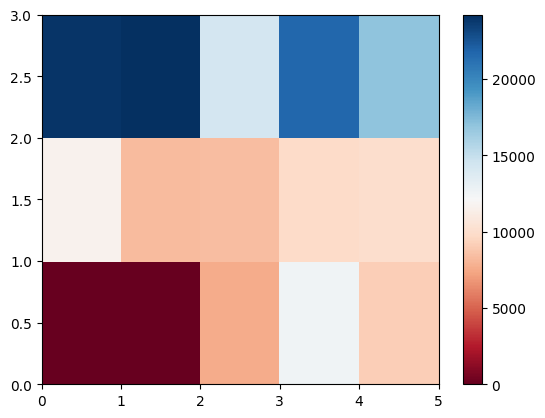

In [76]:
# plotting Heatmap
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show

#### Correlation
Correlation: a measure of the extent of interdependence between variables.
Causation: the relationship between cause and effect between two variables.
It is important to know the difference between these two. Correlation does not imply causation.


**Pearson Correlation** measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.

**P-Value**  is the probability value that the correlation between these two variables is statistically significant.
By convention, when the
* p-value is < 0.001: we say there is strong evidence that the correlation is significant.
* the p-value is < 0.05: there is moderate evidence that the correlation is significant.
* the p-value is < 0.1: there is weak evidence that the correlation is significant.
* the p-value is < 0.1: there is no evidence that the correlation is significant.

In [84]:
# We can obtain this information using "stats" module in the "scipy" library.
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("Interpretation: Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant,\n although the linear relationship isn't extremely strong (~0.585).")

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20
Interpretation: Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant,
 although the linear relationship isn't extremely strong (~0.585).


### **Exercise** - Laptops Pricing Dataset

In [85]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [100]:
file = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df1 = pd.read_csv(file, header=0)
df1.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


(0.0, 3974.15)

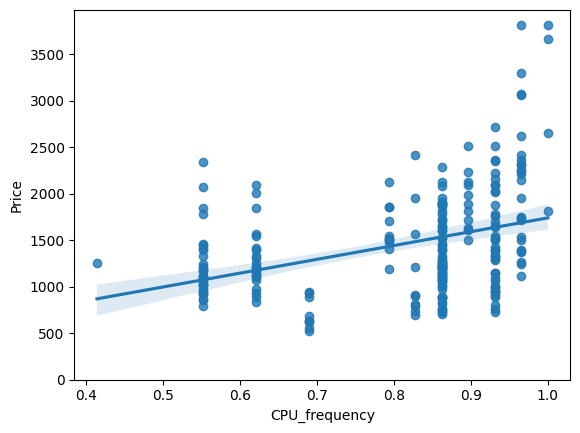

In [101]:
# TASK 1
# Visualize Individual feature patterns
# Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
sns.regplot(x="CPU_frequency", y="Price", data=df1)
plt.ylim(0,)

(0.0, 3974.15)

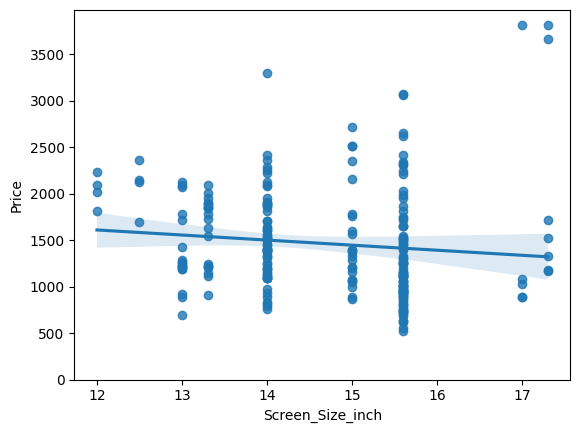

In [102]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df1)
plt.ylim(0,)

(0.0, 3974.15)

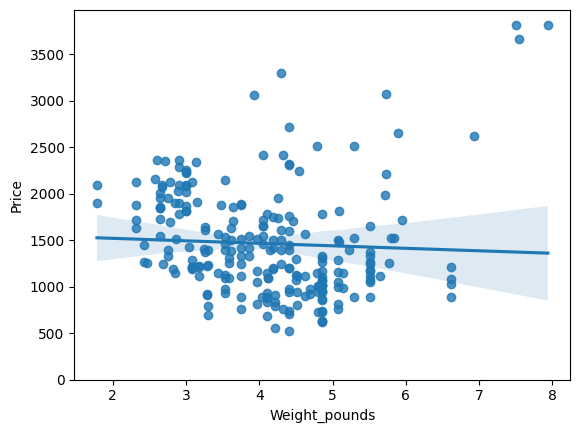

In [103]:
sns.regplot(x="Weight_pounds", y="Price", data=df1)
plt.ylim(0,)

In [104]:
# Calculate correlation values of each feature with 'price'
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df1[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Category', ylabel='Price'>

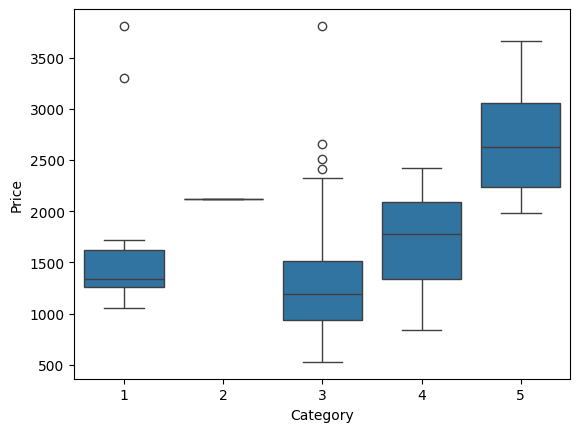

In [105]:
# Catagorical features
sns.boxplot(x='Category', y='Price', data=df1)

In [109]:
# TASK 2
# Descriptive Statistical Analysis
# Generate the statistical description of all the features being used in the data set. Include "object" data types as well.
print(df1.describe(include=["object"]))

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [112]:
# TASK 3
# Groupby and Pivot Table
groups = df1[['GPU', 'CPU_core', 'Price']]
grp_data = groups.groupby(['GPU', 'CPU_core'], as_index=False).mean()
grp_data

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [113]:
grp_pivot = grp_data.pivot(index='GPU', columns='CPU_core')
grp_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

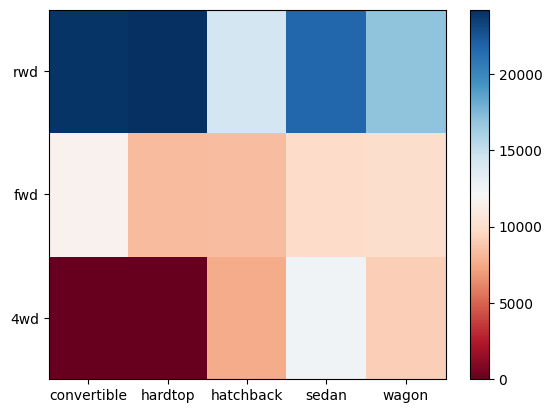

In [114]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [116]:
# TASK 4
# Pearson Correlation and p-values
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df1[param], df1['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857844  with a P-value of P = 3.681560628842868e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118266  with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751549  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  w